## 행 단위 결측 삭제
- 행 단위 결측 삭제는 결측 레코드를 삭제하는 매우 간단한 방법이지만, 두가지 조건을 만족하는 경우에만 수행할 수 있음
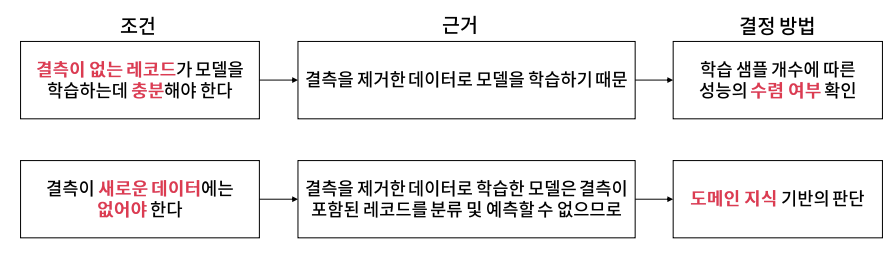

## 열 단위 결측 삭제
- 열 단위 결측 삭제는 결측 레코드를 포함하는 열을 삭제하는 매우 간단한 방법이지만, 두 가지 조건을 만족하는 경우에만 사용 가능
  - 소수 변수에 결측이 많이 포함되어 있음
  - 해당 변수들이 크게 중요하지 않음 ( by 도메인 지식)

In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-4.-머신러닝을-위한-필수-전처리\Part 4. 머신러닝을 위한 필수 전처리\데이터')

### 행 단위 삭제

In [2]:
# 데이터 불러오기
df = pd.read_csv("mammographic.csv")

In [3]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Output
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [4]:
# 특징과 라벨 분리
X = df.drop('Output', axis = 1)
Y = df['Output']

In [5]:
# 학습 데이터와 평가 데이터 분할
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [6]:
Train_X.isnull().sum(axis = 0) # 열별 결측치 개수 확인

BI-RADS     1
Age         3
Shape      23
Margin     36
Density    56
dtype: int64

In [7]:
Train_X.isnull().sum(axis = 0) / len(Train_X) # 열별 결측치 비율 확인
# 결측이 전체적으로 많은 편이 아니나, 모든 컬럼에 결측이 1회 이상 발생 => 열 삭제 불가

BI-RADS    0.001389
Age        0.004167
Shape      0.031944
Margin     0.050000
Density    0.077778
dtype: float64

In [8]:
Train_X.dropna(inplace = True) # 결측이 포함된 레코드 제거
# Train_X = Train_X.dropna()

<ipython-input-8-1caf2a7e696e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_X.dropna(inplace = True) # 결측이 포함된 레코드 제거


In [9]:
Test_X.dropna(inplace = True) # 결측이 포함된 레코드 제거 (주의: 새로 들어온 레코드의 결측이 있으면 처리하지 못함을 의미)

<ipython-input-9-1289f033856d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_X.dropna(inplace = True) # 결측이 포함된 레코드 제거 (주의: 새로 들어온 레코드의 결측이 있으면 처리하지 못함을 의미)


### 열 단위 삭제

In [10]:
# 데이터 불러오기
df = pd.read_csv("post_operative.csv")

In [11]:
# 특징과 라벨 분리
X = df.drop('Decision', axis = 1)
Y = df['Decision']

In [12]:
# 학습 데이터와 평가 데이터 분할
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [13]:
Train_X.head() # COMFORT 변수에 '?'로 결측이 표시되어 있음을 확인

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT
0,mid,low,excellent,mid,stable,stable,stable,15
58,low,low,good,high,stable,stable,stable,10
66,mid,low,excellent,mid,unstable,stable,stable,10
10,mid,mid,good,mid,stable,stable,stable,?
48,high,high,excellent,high,stable,stable,unstable,?


In [14]:
import numpy as np
# 결측이 '?'로 표시되어 있음 => 데이터에 대한 이해가 없으면 적절히 처리가 안될 수 있음
Train_X.replace('?', np.nan).isnull().sum() / len(Train_X)

L-CORE       0.000000
L-SURF       0.000000
L-O2         0.000000
L-BP         0.000000
SURF-STBL    0.000000
CORE-STBL    0.000000
BP-STBL      0.000000
COMFORT      0.253731
dtype: float64

In [15]:
# 모든 결측이 COMFORT에 쏠렸으며, 해당 변수가 중요하지 않다는 도메인 지식 기반 하에 삭제
Train_X.dropna(axis = 1, inplace = True)


# Test_X = Test_X[Train_X.columns]
Test_X.drop('COMFORT', axis = 1, inplace = True) # Test_X에는 COMFORT가 결측이 없었을 수도 있으므로, drop을 이용하여 삭제

<ipython-input-15-f7c45995556d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_X.dropna(axis = 1, inplace = True)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
Train_X.isnull().sum(axis = 0)

L-CORE       0
L-SURF       0
L-O2         0
L-BP         0
SURF-STBL    0
CORE-STBL    0
BP-STBL      0
COMFORT      0
dtype: int64